## KMeans

### KMeans своими руками (*)

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from copy import deepcopy

Что такое deepcopy:

In [ ]:
# @title
# deepcopy - это модуль, позволяющий создавать глубокие копии объектов.
l = [1, 2, 3, 4]

In [ ]:
# @title
# Как известно, подобная конструкция создаст лишь еще одну ссылку на объект l:
ll = l

In [ ]:
# @title
# Тогда как глубокая копия скопирует этот список в памяти и создаст ссылку на копию объекта:
l_deep = deepcopy(l)

In [ ]:
# @title
l.append(5)

In [ ]:
# @title
print(l, ll, l_deep)

[1, 2, 3, 4, 5] [1, 2, 3, 4, 5] [1, 2, 3, 4]


In [ ]:
# @title
m = []
m.extend(l)
m.append(5)

Создадим искуственные данные:

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=1500, centers=4, random_state=170)

In [ ]:
X.shape

(1500, 2)

In [ ]:
X

array([[ -5.19811282,   0.64186932],
       [  0.77584883,   0.83500145],
       [-10.84489837,  -7.55352273],
       ...,
       [  4.24936943, -11.07055451],
       [  2.53417577,  -9.45082102],
       [  4.7740894 , -10.16165079]])

In [ ]:
y

array([1, 2, 0, ..., 3, 3, 3])

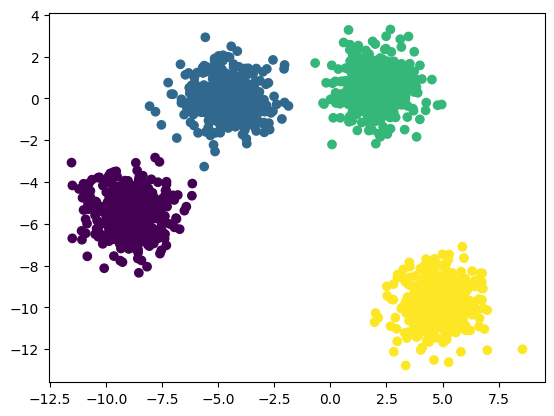

In [ ]:
points_x = X[:,0]
points_y = X[:,1]
plt.scatter(x=points_x, y=points_y, c=y)
plt.show()

Напишем несколько нужных нам функций:

In [ ]:
def get_distance_between_points(point, centroid):
  # вычисляем дистанцию между точкой и центром
  dist = np.linalg.norm(centroid - point)
  return dist

In [ ]:
def sort_dict_ascending(d):
  # сортируем словарь по убыванию
  return {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

In [ ]:
# сделано по https://github.com/ischurov/math-ml-hse-2018/blob/master/sem14_clustering/sem14_clustering.ipynb

def k_means(input, clusters, max_iter):
  """
  input: матрица признаков
  clusters: количество кластеров
  max_iter:
  """
  points = deepcopy(input)
  num_points = len(points)
  # Выбираем начальные центры кластеров (просто первые num_clusters точек)
  centroids = points[:clusters]
  # В качестве результата будет массив с номерами кластеров для каждой точки
  result = [-1] * num_points
  # Предыдущая копия массива result, чтобы сравнивать, поменялось что-то или нет
  prev_result = None

  iteration = 0

  while (iteration < max_iter):

    # останавливаемся, если центры не меняются
    if prev_result != result:

      # если центры еще меняются, записываем предыдущий результат в prev_result
      prev_result = list(result)

      # результат текущего шага
      current_result = []


      for point in points:

        # для каждой точки считаем ее расстояние между ней и каждым центром
        current_distances = {}
        for cent_id in range(len(centroids)):

          dist = get_distance_between_points(point, centroids[cent_id])
          current_distances[cent_id] = dist

        # кластер, к которому принадлежит точка - тот, до чьего центра от нее самый короткий путь
        sorted_dists = sort_dict_ascending(current_distances)
        current_result.append(list(sorted_dists.keys())[0])

      # массив результатов хранит номера кластеров для каждой точки
      result = current_result

      # определяем новые центры
      new_centroids = []

      # смотрим, какие вектора в каком кластере оказались
      for cluster_number in range(clusters):
        vectors = []
        for i in range(len(result)):
          ind = result[i]
          if ind == cluster_number:
            vectors.append(points[i])
        matrix = np.array(vectors)

        # новый центр - среднее от всех векторов кластера
        new_centroids.append(matrix.mean(0))

      centroids = new_centroids

      # отрисовавыем итоги данной итерации
      print("Итерация №{}".format(iteration))
      iteration += 1
      points_x = points[:,0]
      points_y = points[:,1]
      plt.scatter(x=points_x, y=points_y, cmap='plasma', c=result)
      for i in range(len(centroids)):
        plt.scatter(centroids[i][0], centroids[i][1], c="red")
      plt.show()
      result = list(result)

    elif prev_result == result:
      break

  return result, centroids

In [ ]:
N_CLUSTERS = 4

Итерация №0


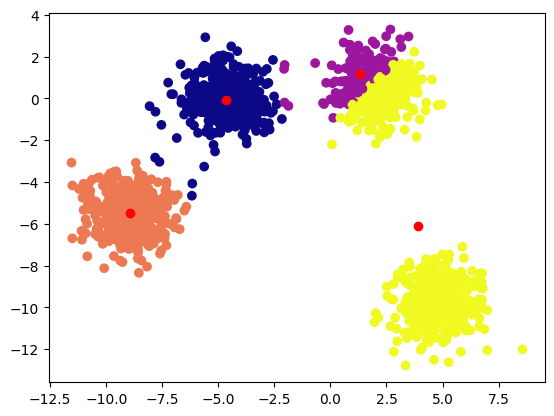

Итерация №1


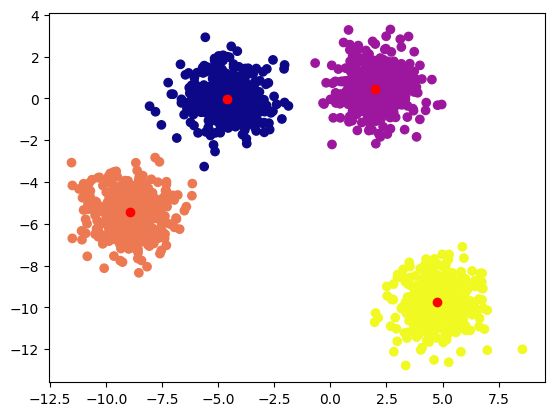

Итерация №2


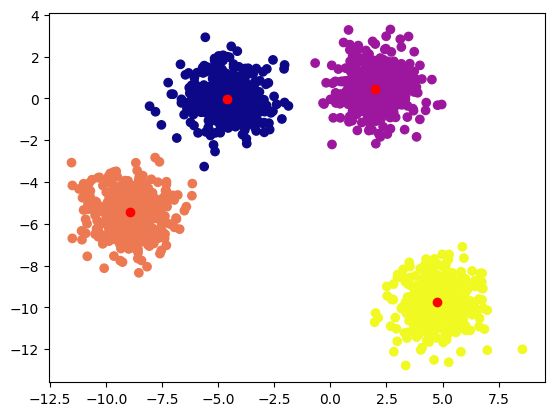

In [ ]:
result, centroids = k_means(X, clusters=N_CLUSTERS, max_iter=30)

**Для самостоятельного изучения (*):** создайте класс KMeans. Его метод fit должен принимать матрицу векторов и возвращать список результатов (номера кластеров для каждого объекта) и координаты центров кластеров. Метод \__init\__ должен принимать количество кластеров, на которые необходимо поделить данные.

### KMeans из коробки

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(X)

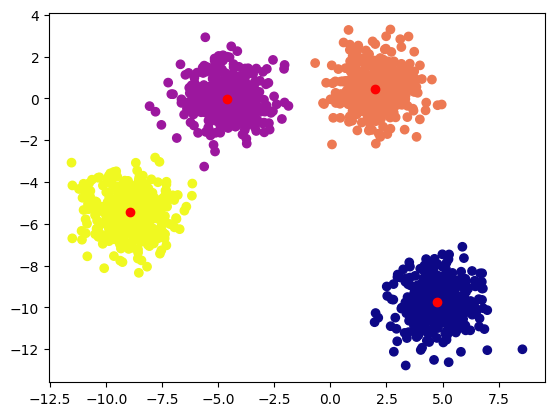

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], cmap='plasma', c=kmeans.labels_)
for i in range(len(kmeans.cluster_centers_)):
  plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], c="red")
plt.show()

Посмотрим, насколько центры на самом деле близки.

In [ ]:
kmeans.cluster_centers_

array([[ 4.77299036, -9.7489611 ],
       [-4.60405329, -0.02613257],
       [ 1.99922786,  0.46076078],
       [-8.92121685, -5.44840113]])

In [ ]:
centroids

[array([-4.60405329, -0.02613257]),
 array([1.99922786, 0.46076078]),
 array([-8.92121685, -5.44840113]),
 array([ 4.77299036, -9.7489611 ])]

Чтобы сравнить наши центры и получившиеся, сделаем матрицу наших центроидов и вычтем матрицы:

In [ ]:
centroids_matrix = np.vstack(centroids)

In [ ]:
centroids_matrix

array([[-4.60405329, -0.02613257],
       [ 1.99922786,  0.46076078],
       [-8.92121685, -5.44840113],
       [ 4.77299036, -9.7489611 ]])

In [ ]:
kmeans.cluster_centers_ - centroids_matrix

array([[  9.37704365,  -9.72282853],
       [ -6.60328115,  -0.48689335],
       [ 10.92044471,   5.90916191],
       [-13.69420721,   4.30055997]])

Нормируем расстояния между центрами:

In [ ]:
['%.4f' % i for i in np.linalg.norm(kmeans.cluster_centers_ - centroids_matrix, axis=1)]

['13.5079', '6.6212', '12.4167', '14.3536']

### Оценка качества

Оценим качество кластеризации с использованием коэффициента силуэта:

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score, homogeneity_completeness_v_measure

In [ ]:
silhouette_score(X, kmeans.labels_)

0.759335349300705

In [ ]:
silhouette_score(X, result)

0.759335349300705

А также с помощью метрик, требующих аннотированного множества (у нас же есть y):

In [ ]:
print(rand_score(y, kmeans.labels_))

1.0


In [ ]:
print(adjusted_rand_score(y, kmeans.labels_))

1.0


In [ ]:
print(rand_score(y, result))

1.0


In [ ]:
print(adjusted_rand_score(y, result))

1.0


In [ ]:
print(homogeneity_completeness_v_measure(y, kmeans.labels_))

(1.0, 1.0, 1.0)


In [ ]:
print(homogeneity_completeness_v_measure(y, result))

(1.0, 1.0, 1.0)


### Поиск оптимального числа кластеров

Коэффициент силуэта можно также использовать для того, чтобы оценить, какое количество кластеров оптимально для данной задачи. Для этого нужно посчитать не только коэффициент силуэта, но и силуэт каждой точки:

In [ ]:
samples_silhouettes = silhouette_samples(X, kmeans.labels_)

In [ ]:
samples_silhouettes

array([0.79482645, 0.69478225, 0.69016398, ..., 0.8472286 , 0.74980479,
       0.88540155])

Если мы знаем силуэт каждой точки, можно узнать силуэт кластера:

In [ ]:
samples_silhouettes[kmeans.labels_ == 0]

array([0.87586376, 0.86022581, 0.86138088, 0.84326039, 0.87996776,
       0.82555167, 0.86219139, 0.79696511, 0.88535349, 0.85855145,
       0.84369195, 0.88006165, 0.88127511, 0.83320161, 0.83838217,
       0.86604483, 0.73156704, 0.84493449, 0.84895805, 0.88452754,
       0.84616426, 0.78729493, 0.88644526, 0.78830889, 0.86545007,
       0.87891821, 0.88240434, 0.84499211, 0.74750857, 0.88389405,
       0.88491838, 0.81928132, 0.86083333, 0.84482742, 0.82269382,
       0.84183881, 0.88001471, 0.84501246, 0.76413602, 0.84289943,
       0.87030087, 0.86852407, 0.82920233, 0.87448765, 0.84794094,
       0.85125506, 0.85248511, 0.88703522, 0.86904704, 0.873849  ,
       0.84684957, 0.87918459, 0.87043322, 0.84773342, 0.85307204,
       0.82150268, 0.88026316, 0.88545206, 0.85172382, 0.88660541,
       0.87139176, 0.77730133, 0.79274732, 0.88403514, 0.85791209,
       0.75626826, 0.88593432, 0.87499408, 0.84703569, 0.8828197 ,
       0.82101148, 0.81588314, 0.78387554, 0.78261182, 0.81170

In [ ]:
sorted(samples_silhouettes[kmeans.labels_ == 0], reverse=True)

[0.8873856707985948,
 0.8873372515800273,
 0.8872753277450873,
 0.8872408751623355,
 0.887130361828705,
 0.8871252473328116,
 0.8870352211601907,
 0.8870300542873483,
 0.886998999740804,
 0.8866054146184472,
 0.8864719005429157,
 0.8864452640131079,
 0.8859343237144702,
 0.8859168521356502,
 0.8858127499732821,
 0.8854520643448633,
 0.8854015534603644,
 0.8853698897976773,
 0.8853534865353558,
 0.8851654345616269,
 0.8851140551694865,
 0.8849510463107526,
 0.8849183766026354,
 0.8848365115144396,
 0.884707156097122,
 0.8846511389842499,
 0.8845275352069922,
 0.8840893727539197,
 0.8840519664125773,
 0.8840351353995497,
 0.8838950377317699,
 0.8838940489932381,
 0.8836745136106798,
 0.8835938174361945,
 0.8834546085024364,
 0.8834334417404136,
 0.8832118723943752,
 0.8832055231338298,
 0.8831939437601349,
 0.8830687903972948,
 0.8830239667225258,
 0.8829788820438591,
 0.8828197006721601,
 0.8827284335238657,
 0.8824043412917608,
 0.882187256780541,
 0.8819962030096434,
 0.88191508164515

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)

In [ ]:
# код: https://www.kaggle.com/code/realstay/clustering-with-silhouette-plot-elbow-method

def plot_silhouettes(samples_silhouettes, labels, n_clusters, silhouette_avg):
  fig, ax = plt.subplots()
  y_lower = 10

  for i in range(n_clusters):
      ith_cluster_silhouette_values = samples_silhouettes[labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i


      ax.fill_betweenx(np.arange(y_lower,y_upper),
                      0,
                      ith_cluster_silhouette_values,
                      alpha=0.3)

      #label the silhouse plots with their cluster numbers at the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      #compute the new y_lower for next plot
      y_lower = y_upper +10

  ax.set_title("Silhuoette plot")
  ax.set_xlabel("silhouette score")
  ax.set_ylabel("Cluster label")

  #the vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax.set_yticks([])
  ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

  plt.show()

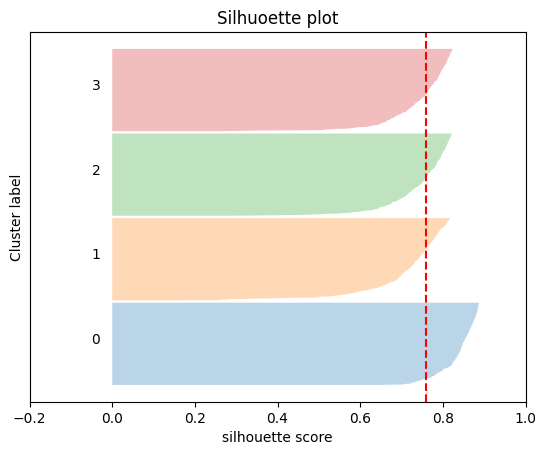

In [ ]:
plot_silhouettes(samples_silhouettes, kmeans.labels_, N_CLUSTERS, silhouette_avg)

Сравните с другими количествами кластеров:

In [ ]:
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
kmeans_7 = KMeans(n_clusters=7, random_state=0, n_init="auto").fit(X)

In [ ]:
samples_silhouettes_3 = silhouette_samples(X, kmeans_3.labels_)
silhouette_avg_3 = silhouette_score(X, kmeans_3.labels_)

In [ ]:
samples_silhouettes_7 = silhouette_samples(X, kmeans_7.labels_)
silhouette_avg_7 = silhouette_score(X, kmeans_7.labels_)

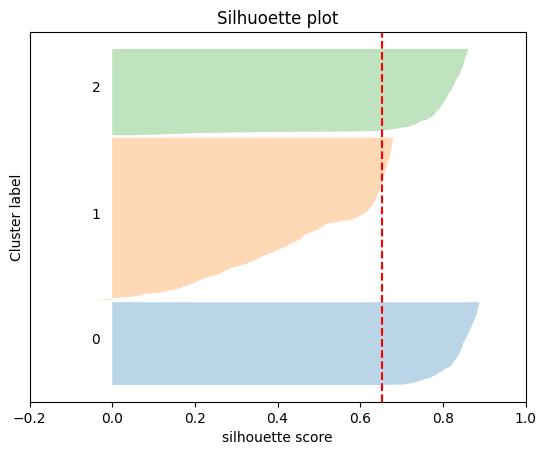

In [ ]:
plot_silhouettes(samples_silhouettes_3, kmeans_3.labels_, 3, silhouette_avg_3)

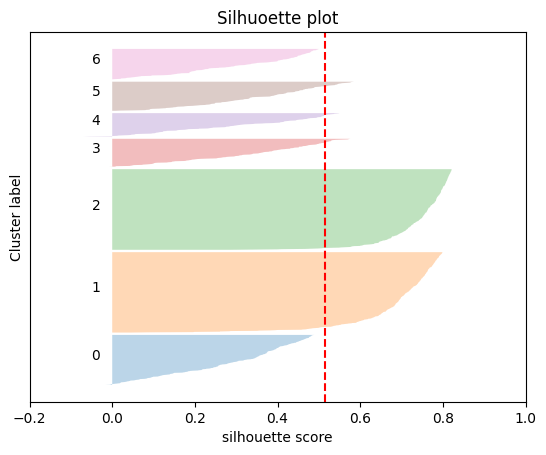

In [ ]:
plot_silhouettes(samples_silhouettes_7, kmeans_7.labels_, 7, silhouette_avg_7)

In [ ]:
print(silhouette_avg, silhouette_avg_3, silhouette_avg_7)

0.759335349300705 0.6535110425298724 0.5137508136853415


Другой способ найти оптимальное количество кластеров - так называемый "метод локтя", который заключается в оценке within-cluster sum of squares. При оптимальном количестве кластеров средние расстояния между точками в одном кластере будут маленькими.

In [ ]:
# код: https://www.kaggle.com/code/realstay/clustering-with-silhouette-plot-elbow-method
max_cluster = 10
clusters = range(1, max_cluster)
intra_sum_of_square_list = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # параметр inertia_ показывает сумму квадратов дистанций от объектов до ближайшего к ним центра кластера
    intra_sum_of_square_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

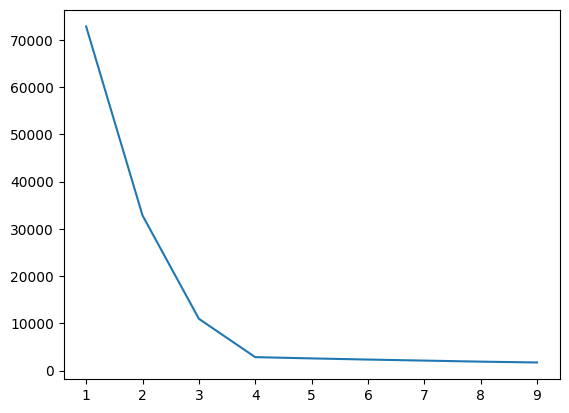

In [ ]:
plt.plot(clusters, intra_sum_of_square_list)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=1, min_samples=40).fit(X)

In [ ]:
clustering.labels_

array([ 0,  1, -1, ...,  2,  2,  2])

In [ ]:
# @title
import pandas as pd

In [ ]:
# @title
df = pd.DataFrame(X)

In [ ]:
# @title
df

,0,1
0,-5.198113,0.641869
1,0.775849,0.835001
2,-10.844898,-7.553523
3,1.957159,-0.384643
4,-3.519162,0.039345
...,...,...
1495,-8.527192,-6.726876
1496,2.465936,1.367148
1497,4.249369,-11.070555
1498,2.534176,-9.450821


In [ ]:
# @title
df['label'] = clustering.labels_

In [ ]:
# @title
df

,0,1,label
0,-5.198113,0.641869,0
1,0.775849,0.835001,1
2,-10.844898,-7.553523,-1
3,1.957159,-0.384643,1
4,-3.519162,0.039345,0
...,...,...,...
1495,-8.527192,-6.726876,3
1496,2.465936,1.367148,1
1497,4.249369,-11.070555,2
1498,2.534176,-9.450821,2


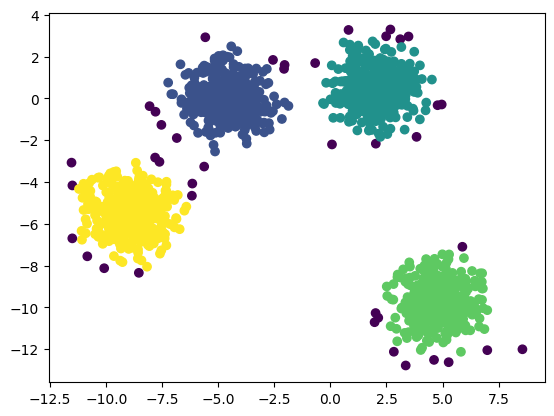

In [ ]:
points_x = X[:,0]
points_y = X[:,1]
plt.scatter(x=points_x, y=points_y, c=clustering.labels_)
plt.show()

Посмотрим на результаты с разными значениями epsilon и min_samples:

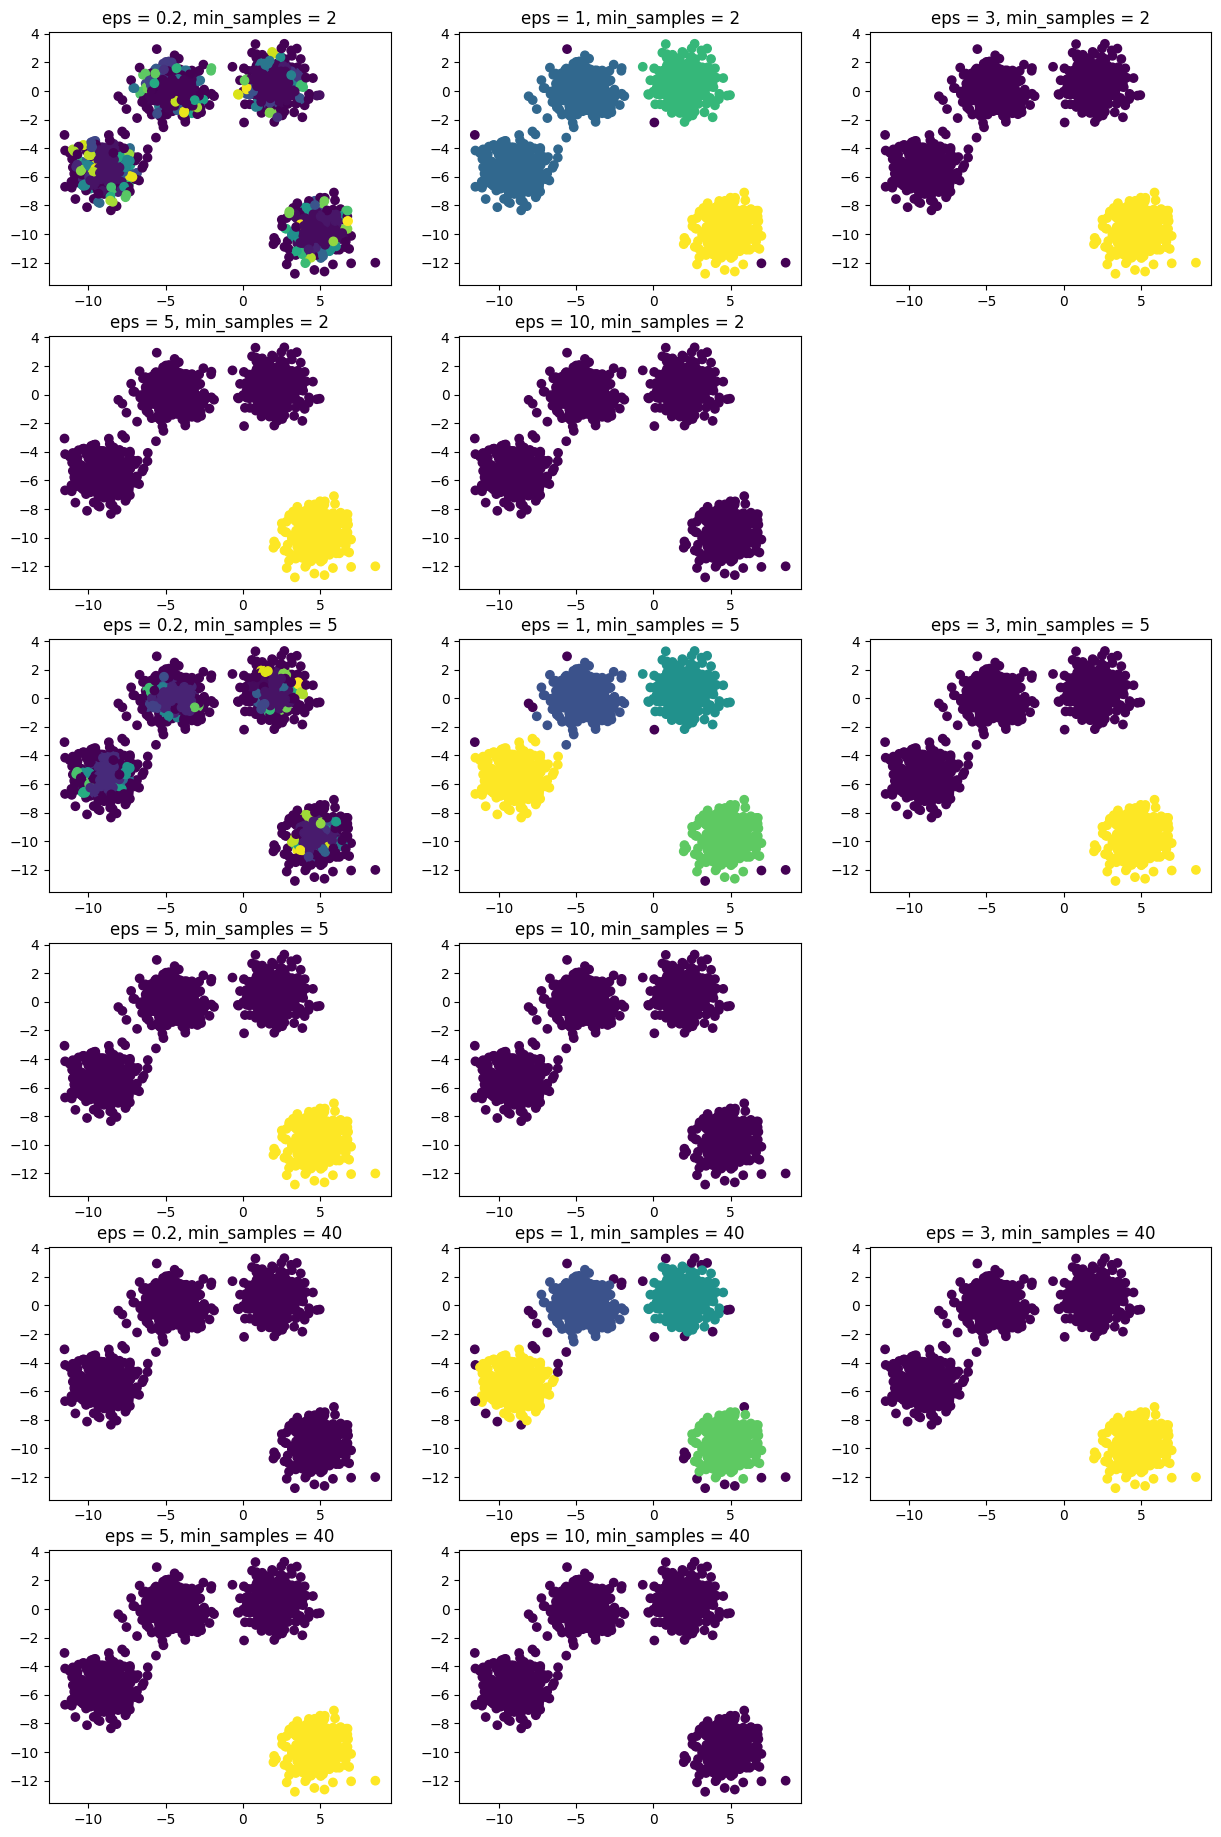

In [ ]:
# код: кажется, https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/seminars/sem11_clustering%2Bpca.ipynb
plt.figure(figsize= (15,23))
i = 1
for samples in [2, 5, 40]:
    for e in [0.2, 1, 3, 5, 10]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()


**Дополнительное задание:** попробуйте подобрать значения eps и mean_samples, при которых будет существовать только четыре кластера.

### Сложные структуры

Сравним работу DBSCAN и KMeans на вложенных друг в друга кольцах.

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X_noisy_circles, y_noisy_circles = make_circles(n_samples=1500, factor=.5, noise=.05)

In [ ]:
X_noisy_circles

array([[ 0.40418439,  0.94729395],
       [ 0.15663333,  0.37080896],
       [ 0.49949167, -0.10770545],
       ...,
       [ 0.97635566,  0.49190627],
       [ 0.25959655,  0.45553454],
       [ 0.37244038, -0.13900399]])

In [ ]:
y_noisy_circles

array([0, 1, 1, ..., 0, 1, 1])

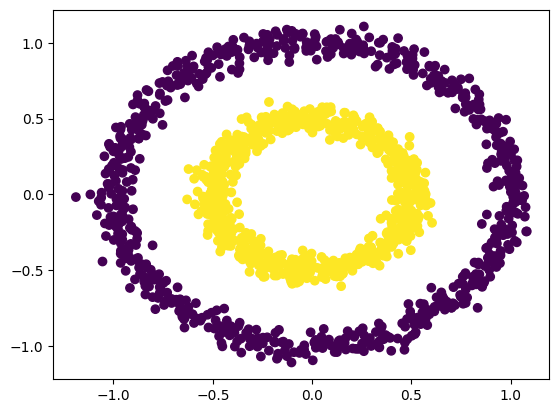

In [ ]:
points_x = X_noisy_circles[:,0]
points_y = X_noisy_circles[:,1]
plt.scatter(x=points_x, y=points_y, c=y_noisy_circles)
plt.show()

Попробуем DBSCAN:

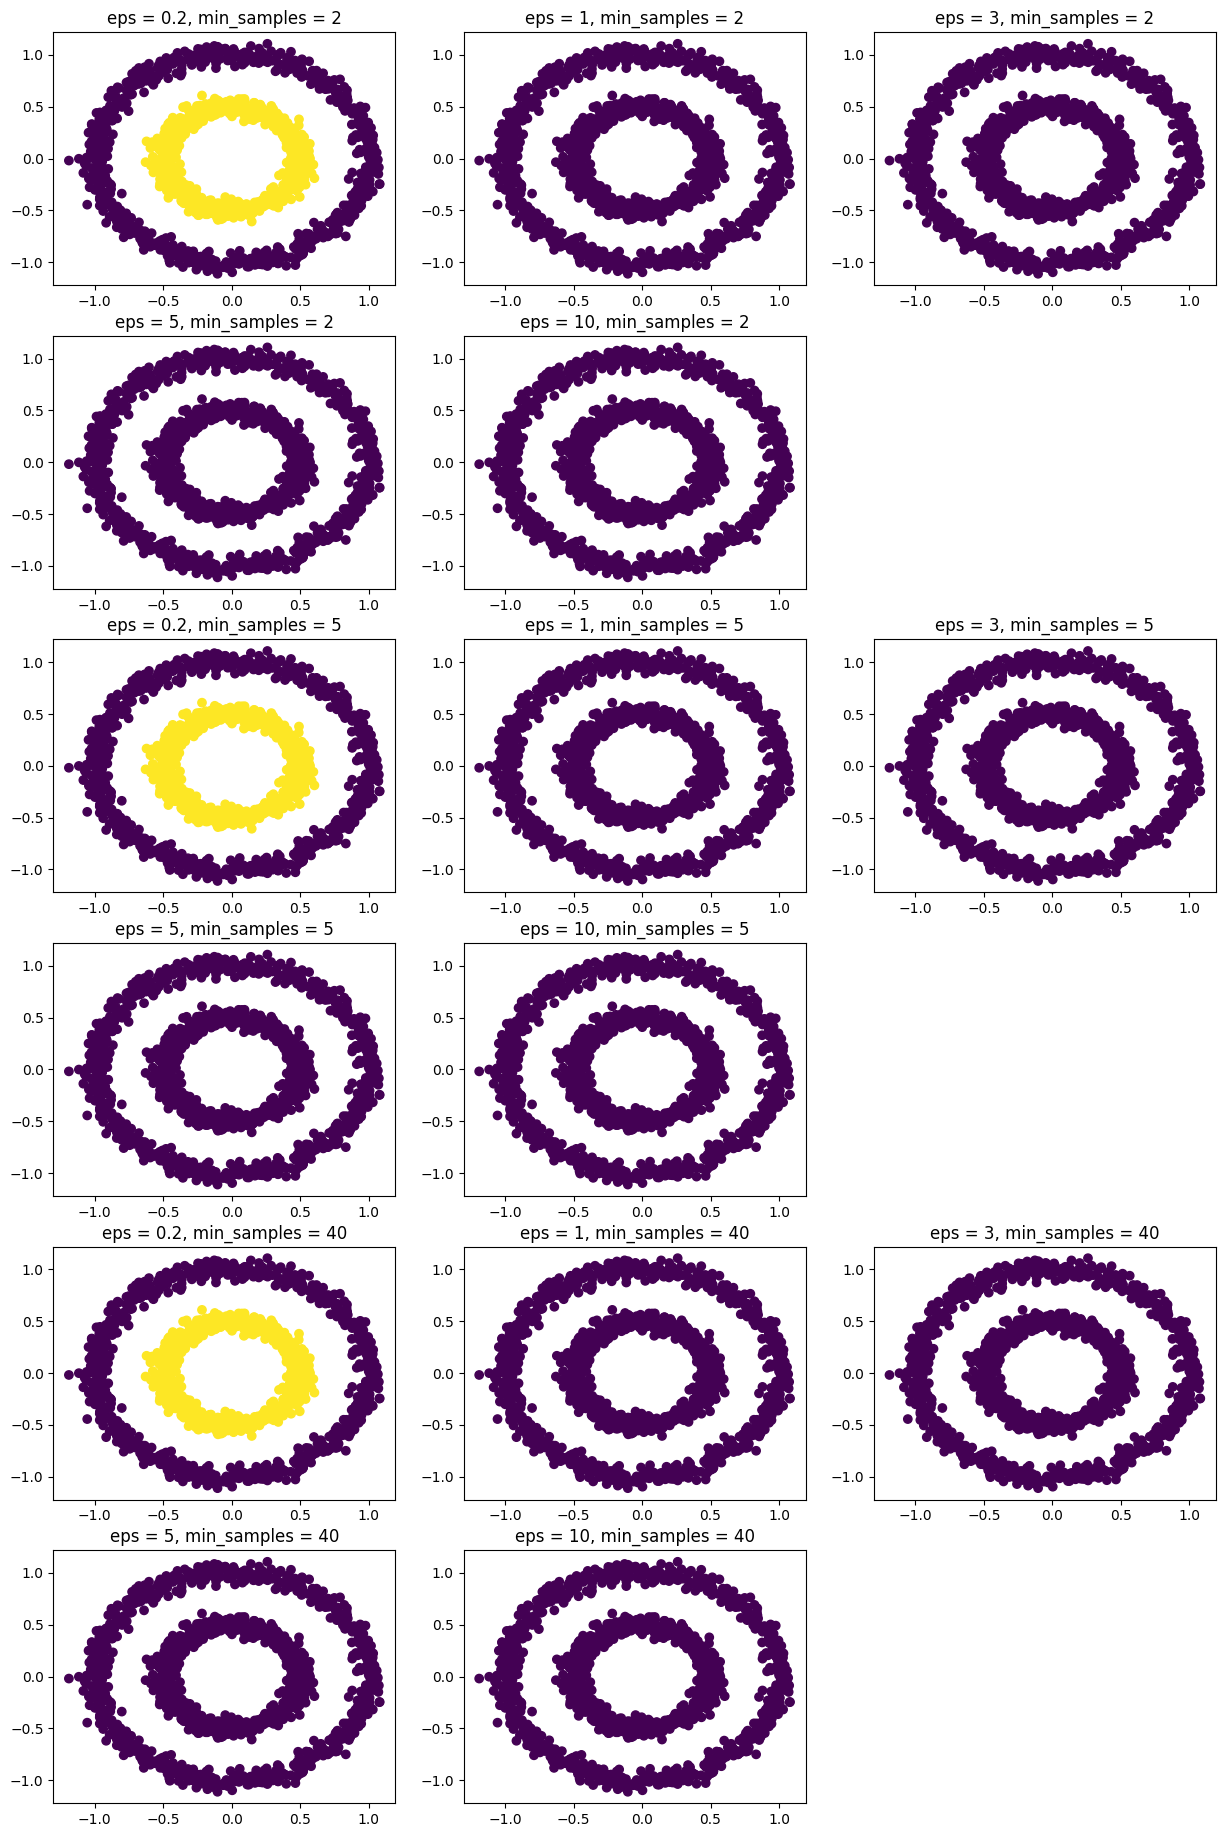

In [ ]:
plt.figure(figsize= (15,23))
i = 1
for samples in [2, 5, 40]:
    for e in [0.2, 1, 3, 5, 10]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_noisy_circles)
        plt.subplot(6, 3, i)
        plt.scatter(X_noisy_circles[:,0], X_noisy_circles[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

In [ ]:
dbscan_rings = DBSCAN(eps=0.2, min_samples=40).fit(X_noisy_circles)

In [ ]:
samples_silhouettes_dbscan = silhouette_samples(X_noisy_circles, dbscan_rings.labels_)
silhouette_avg_dbscan = silhouette_score(X_noisy_circles, dbscan_rings.labels_)

In [ ]:
set(dbscan_rings.labels_)

{0, 1}

In [ ]:
sorted(samples_silhouettes_dbscan[dbscan_rings.labels_ == 0])[:20]

[-0.22053510434908477,
 -0.21563705758060772,
 -0.21560017937451809,
 -0.21451261845987565,
 -0.2143798544721564,
 -0.2109757224997639,
 -0.21024836653581033,
 -0.2095180766735174,
 -0.2089617509238699,
 -0.20782657885440606,
 -0.20640851178651967,
 -0.20542198167569536,
 -0.20398544472767513,
 -0.20234418321873726,
 -0.20201374182639217,
 -0.20198867832788722,
 -0.20171651663072476,
 -0.20143840387012402,
 -0.20118225993601827,
 -0.20116412939871006]

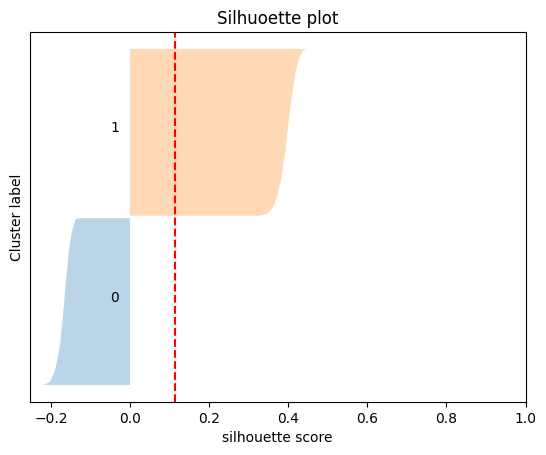

In [ ]:
plot_silhouettes(samples_silhouettes_dbscan, dbscan_rings.labels_, 2, silhouette_avg_dbscan)

KMeans:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

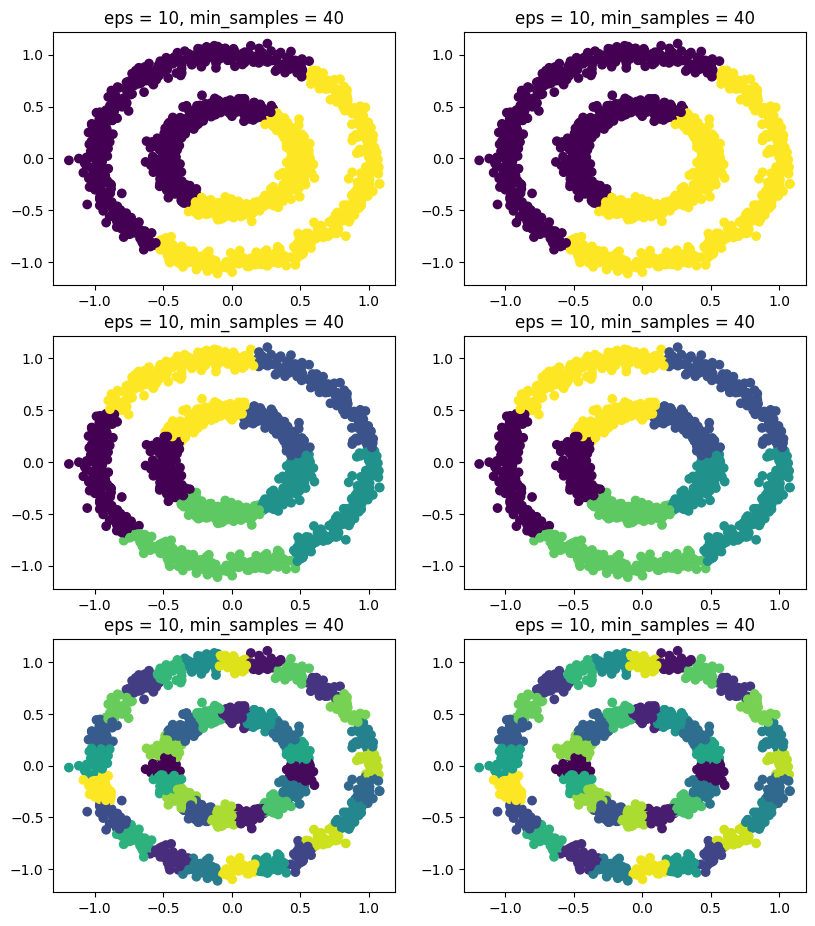

In [ ]:
plt.figure(figsize= (15,23))
i = 1
for n_clusters in [2, 5, 40]:
    for alg in ['lloyd', 'elkan']:
        kmeans = KMeans(n_clusters=n_clusters, algorithm=alg, random_state=0).fit(X_noisy_circles)
        clusters = kmeans.labels_
        plt.subplot(6, 3, i)
        plt.scatter(X_noisy_circles[:,0], X_noisy_circles[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

## Иерархическая кластеризация

Для начала разберем пример с датасетом характеристик ирисов из sklearn:

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Шкалируем данные, т.к. изначально признаки принадлежат разным шкалам:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_iris = scaler.fit_transform(iris.data)

In [ ]:
clustering = AgglomerativeClustering(n_clusters=4).fit(scaled_iris[:20])

**Дополнительное задание:** сравните результаты работы алгоритма, меняя параметр linkage (метод измерения расстояния между кластерами).

In [ ]:
clustering.labels_

array([2, 0, 0, 0, 2, 3, 2, 2, 0, 0, 3, 2, 0, 0, 1, 1, 3, 2, 3, 3])

In [ ]:
# код: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

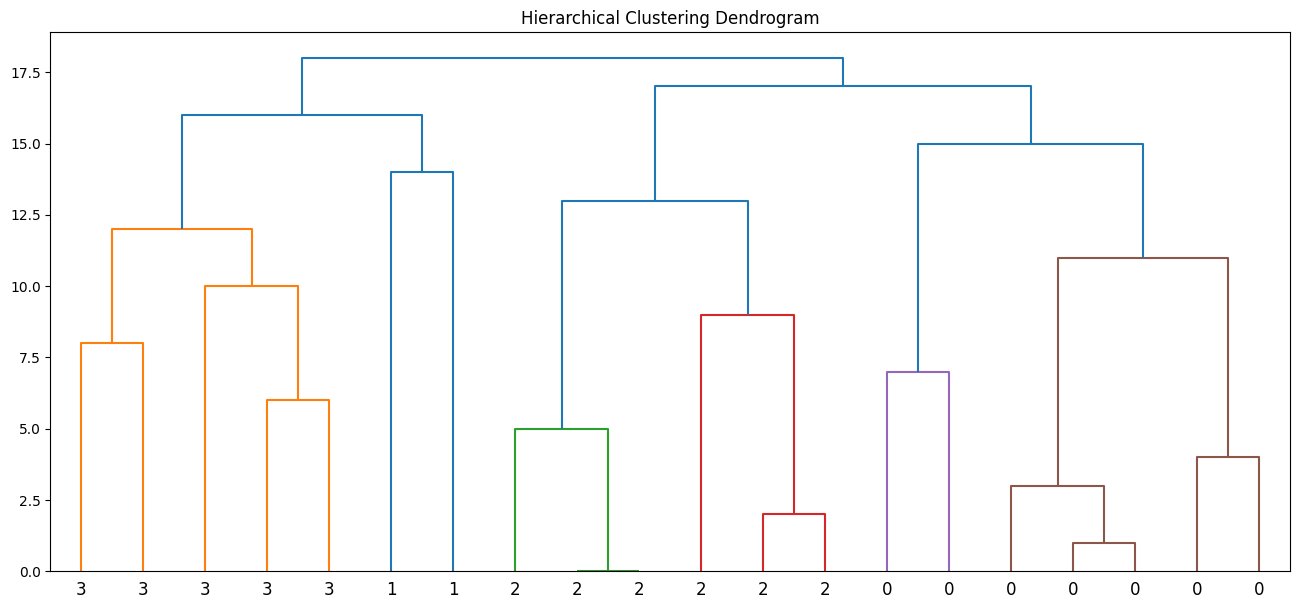

In [ ]:
plt.figure(figsize=(16,7))
plot_dendrogram(clustering, labels=clustering.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Теперь попробуем наши данные (четыре кластерных облака):

In [ ]:
hierarchical_blobs = AgglomerativeClustering(n_clusters=4).fit(X)

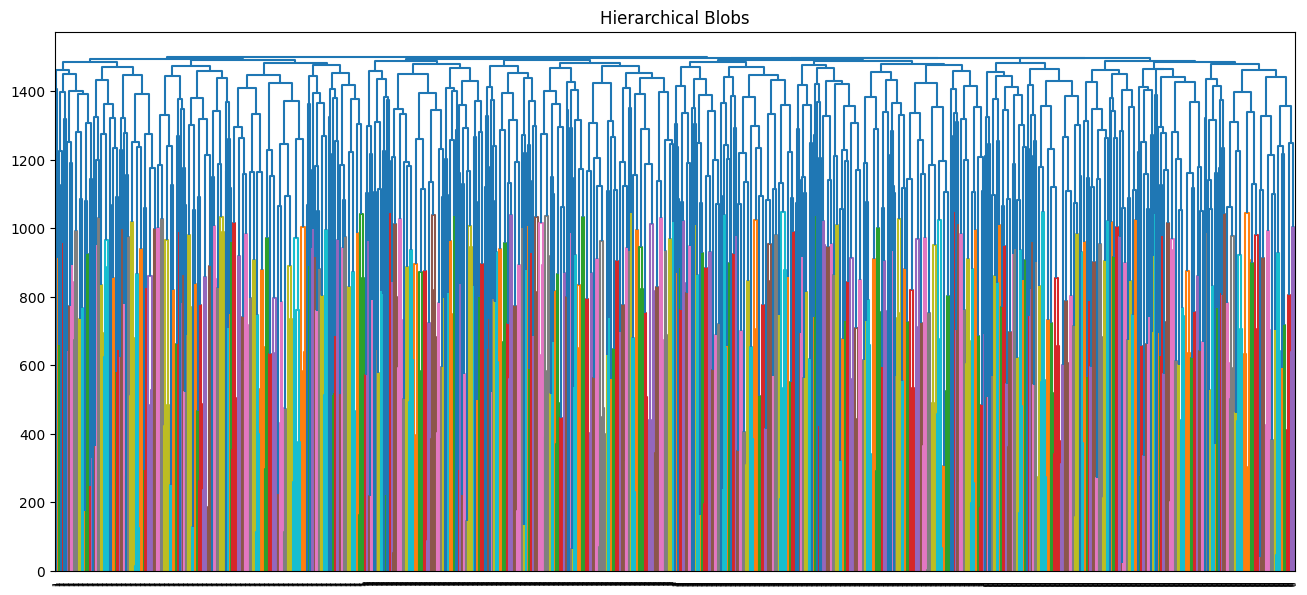

In [ ]:
plt.figure(figsize=(16,7))
plot_dendrogram(hierarchical_blobs, labels=hierarchical_blobs.labels_)
plt.title('Hierarchical Blobs')
plt.show()

Как видите, дендрограмму лучше рисовать на данных до 50-100 вхождений. Поэтому лучше нарисовать обычный график:

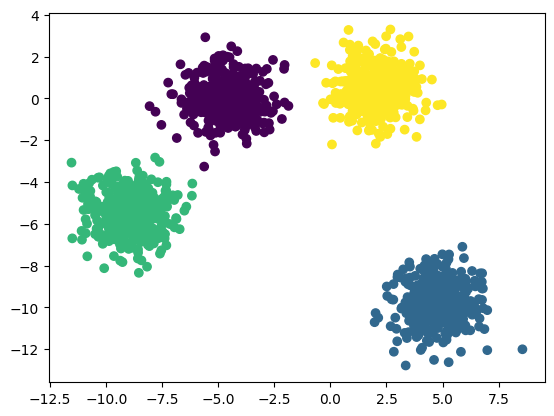

In [ ]:
points_x = X[:,0]
points_y = X[:,1]
plt.scatter(x=points_x, y=points_y, c=hierarchical_blobs.labels_)
plt.show()

Теперь посмотрим, как алгоритм справится с кругами:

In [ ]:
hierarchical_circles = AgglomerativeClustering(n_clusters=2).fit(X_noisy_circles)

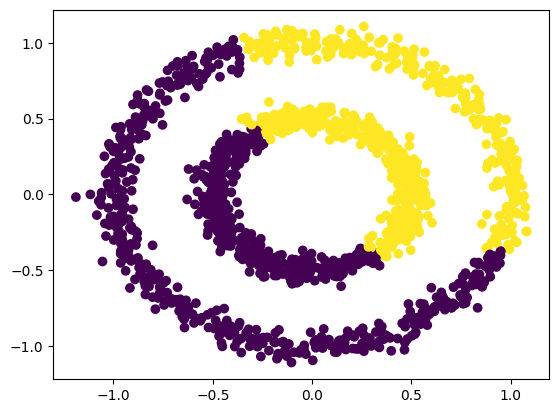

In [ ]:
points_x = X_noisy_circles[:,0]
points_y = X_noisy_circles[:,1]
plt.scatter(x=points_x, y=points_y, c=hierarchical_circles.labels_)
plt.show()

Попробуем другой метод подсчета расстояний между кластерами:

In [ ]:
hierarchical_circles = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X_noisy_circles)

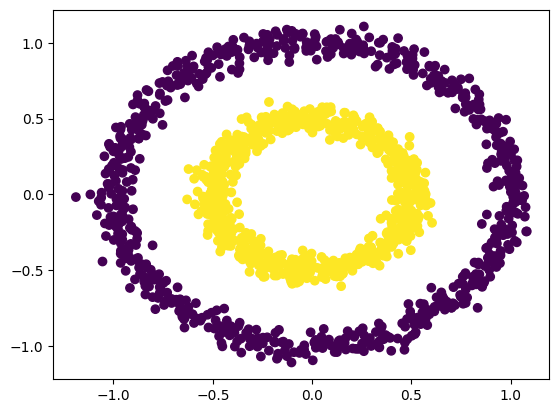

In [ ]:
points_x = X_noisy_circles[:,0]
points_y = X_noisy_circles[:,1]
plt.scatter(x=points_x, y=points_y, c=hierarchical_circles.labels_)
plt.show()